# AnimeGM - Convolutional Autoencoder
GOAL: Generate new anime-style images
    
Methodology:
1. Build a dataset of images suitable for out needs
2. Build a generative model.
3. Train the model
4. Generate a new image with random numbers
5. Transfer style to a photo
6. Examine results

## 1. Build a dataset
Pull in an existing dataset and modify it for my needs.

Lets start with the danbooru 2017 anime image dataset. Now this dataset is huge. So we are only going to use 1 torrent of the SFW subset.

### Imports

In [1]:
import pandas as pd
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import seaborn as sns; sns.set()
from skimage.transform import resize
from os import listdir
from os.path import join
from skimage import data
import tensorflow as tf
from tensorflow.python.framework.ops import reset_default_graph
%matplotlib inline

### Functions

In [2]:
def gray_scale_resize(image, resize_dim):
    # convert image to grayscale
    # same computation while we experiment
    gray_image = color.rgb2gray(image)
    
    # Resize the image down to 128x128
    resized_image = resize(gray_image, (resize_dim, resize_dim))
    
    return resized_image

In [3]:
def load_images(paths_list, n_images, resize_dim):
    # slice paths list to the amount we want
    slice_paths_list = paths_list[:n_images]

    # create an array for images
    images = np.zeros((n_images, resize_dim, resize_dim), dtype=np.float32)
        
    for i, image_path in enumerate(slice_paths_list): 
        # read image
        image = misc.imread(join(path, image_path))

        # rescale image
        images[i] = gray_scale_resize(image, resize_dim)
        
    return images

In [4]:
def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [5]:
def show_images(images, figsize=(10, 10)):
    # get the number of images
    n_images = images.shape[0]
    # get the square root of the number of images
    squareroot = int(np.ceil(np.sqrt(n_images)))
    
    fig, ax = plt.subplots(squareroot, squareroot, figsize=figsize,
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for i, axi in enumerate(ax.flat):
        # exit if the index of subplots is greater than amount of images
        if i >= n_images:
            return
        im = axi.imshow(images[i], cmap='gray')

In [6]:
def get_batch(batch_size, images):
    np.random.RandomState(0)
    
    # get shape of images
    images_shape = images.shape
    
    # create a range based on number of images
    images_range = np.arange(0, images_shape[0])
    
    # pick n batch_size random elements from images range
    random_indices = np.random.choice(images_range, batch_size, replace=False)
    
    # use random indices to grab a batch from images
    random_elements = images[random_indices]
    
    return random_elements

In [7]:
# get the normalized image
def preprocess(images, mean_image, std_dev_image):
    norm_image = (images - mean_image) / std_dev_image
    return norm_image

In [8]:
# remove normalization
def deprocess(norm_image, mean_image, std_dev_image):
    denorm_image =  (norm_image * std_dev_image) + mean_image
    return denorm_image

### Variables

In [9]:
# base path
path = 'danbooru-small'

# list of img paths
paths_list = listdir(path)

# number of image to use in dataset
n_images = 1000

# number of pixels to resize image to
resize_dim = 64

# number of features
n_features = resize_dim * resize_dim

In [10]:
# hyper parameters~~~~
batch_size = 100
n_batches = int(n_images / batch_size)
n_epochs = 50
n_filters = [128, 128, 128, 128]
filter_sizes = [6, 6, 6, 6]

# number of test images
n_tests = 10

### Prepare data

In [11]:
# load images
images = load_images(paths_list, n_images, resize_dim)

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: U

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


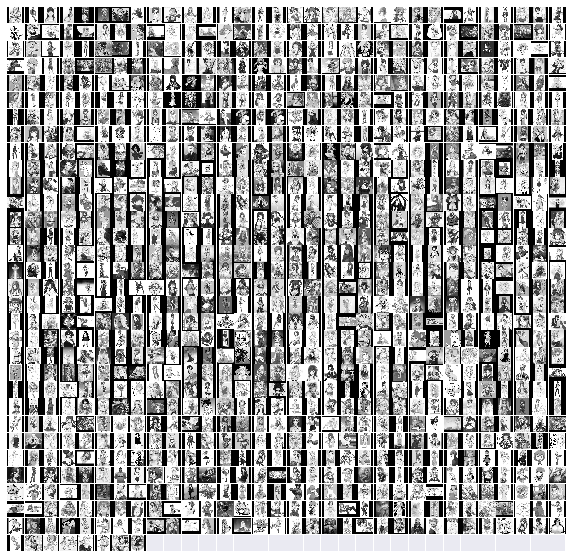

In [12]:
# plot the images of the dataset
show_images(images)

In [13]:
# reshape images 
reshaped_images = images.reshape(-1, n_features)

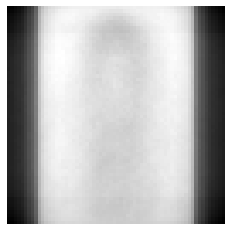

In [14]:
# get the mean image of the dataset
# minus this from each batch so to normalize them.
# this will help the values from going wild
mean_image = np.mean(reshaped_images, axis=0)

# flatten it
mean_image_reshaped = mean_image.reshape(resize_dim, resize_dim)

# inspect it
show_image(mean_image_reshaped)

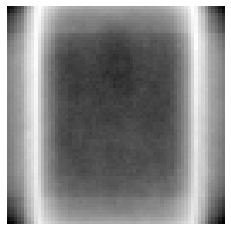

In [15]:
# get the standard deviation image
std_dev_image = reshaped_images.std(axis=0)

# flatten it
std_dev_image_reshaped = std_dev_image.reshape(resize_dim, resize_dim)

# inspect it
show_image(std_dev_image_reshaped)

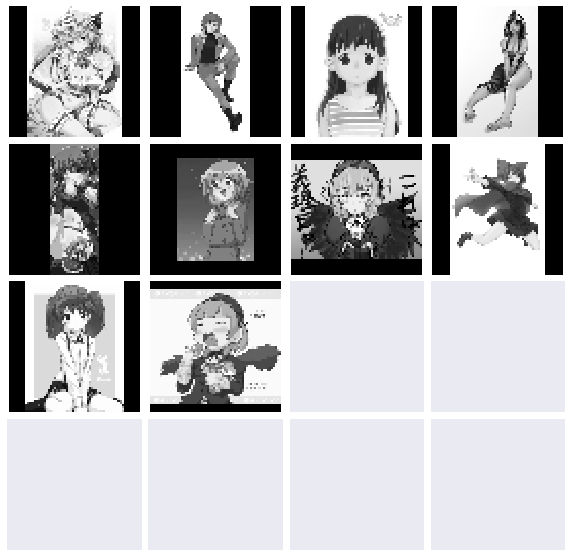

In [16]:
# test images to reconstruct
test_images = reshaped_images[:n_tests]

# reshape them
reshaped_test_images = test_images.reshape(-1, resize_dim, resize_dim)

# plot them
show_images(reshaped_test_images)

This generative model will also substract the mean image from the dataset so lets get that

## 2. Build a generative model
Lets build a convolutional autoencoder. While the idea is similar to the autoencoder, we are going to try to account for whats happening around pixels as opposited to just the pixel to pixel difference.

Previously, our input was an image [64px, 64px] of some number of samples:
`[n_samples, n_dim, n_dim]`

This was reshaped to be flattened so that we could feed the autoencoder with a long vector:
`[n_samples, n_dim * n_dim]`

Now we will use a 4-D tensor to preserve the relationship of the pixels:
`[n_samples, n_dim, n_dim, color_channel]`

In [17]:
# reset the current graph and start over
reset_default_graph()

In [18]:
# create a place holder for inputs
X = tf.placeholder(tf.float32, [None, n_features])

In [19]:
# reshape the X tensor to be a 4-D tensor
X_tensor = tf.reshape(X, [-1, resize_dim, resize_dim, 1])

Instead of matrix operations, we ware going to create convolution operations.

We need to decide on filter size, and the number of filters, and number of layers

In [20]:
# Build the first half of the autoencoder which reduces dimensions at each layer
# copy X placeholder to current_input
current_input = X_tensor

# insteading of starting with the number of pixels, we will use the number of channels.
# this will help us find the first set of filters
n_input = 1

# create a list to store each matrix created
Ws = []
shapes = []

# loop over the list of n_filters and create a layer
# layer_i = index of current element
# n_output = element
for layer_i, n_output in enumerate(n_filters):
    # use variable scope to encapsulate variables
    # prefix all variables created in this scope
    with tf.variable_scope("encoder/layer/{}".format(layer_i)):
        # keep track of the shapes of each layer
        # we will use them in the decoder
        shapes.append(current_input.get_shape().as_list())
        
        # create a weight matrix which will reduce the amount of informations
        # in the input of each layer
        W = tf.get_variable(
                name='W',
                shape=[
                    filter_sizes[layer_i],
                    filter_sizes[layer_i],
                    n_input,
                    n_output
                ],
                initializer=tf.random_normal_initializer(mean=0.0, stddev=0.02))
        
        # convoluve the input with the shared wieght matrix
        h = tf.nn.conv2d(
                current_input,
                W,
                strides=[1, 2, 2, 1],
                padding='SAME')
        
        # use an activation function (RELU) on the output and set it to the input for the next layer
        current_input = tf.nn.relu(h)
        
        # store the weight matrix so that we can build the decoder
        Ws.append(W)
        
        # update the input dimensions with the current layer output
        n_input = n_output

At this point, we have the first half of the convolutional autoencoder. the input to the second half is at it's smallest dimensions. 

Additionally, the encoded weights are stored

This means it should be the size of the last element of the dimensions list

Build the next half of the convolutional autoencoder by increasing the dimensions at each layer back to the original

In [21]:
# reverse the order of the weight matrices
Ws.reverse()

# reverse the order of the shapes layer
shapes.reverse()

# reverse the number of filters
n_filters.reverse()

# append the laster filter size which is the original number of color channels
n_filters = n_filters[1:] + [1]

print(n_filters, shapes)

[128, 128, 128, 1] [[None, 8, 8, 128], [None, 16, 16, 128], [None, 32, 32, 128], [None, 64, 64, 1]]


In [22]:
# loop over the list of filters and create a layer
# layer_i = index of current element
for layer_i, shape in enumerate(shapes):
    # use variable scope to encapsulate variables
    # prefix all variables created in this scope
    with tf.variable_scope("decoder/layer/{}".format(layer_i)):
        
        # use the weight matrix from the encoder
        W = Ws[layer_i]
        
        # convolve the input with the weight matrix
        h = tf.nn.conv2d_transpose(
                current_input,
                W,
                tf.stack([
                    tf.shape(X)[0],
                    shape[1],
                    shape[2],
                    shape[3],
                ]),
                strides=[1, 2, 2, 1],
                padding='SAME')
        
        # use an activation function (RELU) on the output and set it to the input for the next layer
        current_input = tf.nn.relu(h)

In [23]:
# the current_input of the last layer is Y
Y = current_input
Y = tf.reshape(Y, [-1, n_features])

### Define cost function
Define the training signal.
This will be a cost function to measure the success of the network

In [24]:
# measure average difference across pixels
pixel_cost = tf.reduce_mean(tf.squared_difference(X, Y), 1)

# measure mean across batches
cost = tf.reduce_mean(pixel_cost)

# use an Adam optimizer for training which tries to minimize cost
learning_rate = 0.0001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

## 3. Train the model

In [ ]:
# create a session to use the graph
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
# train by running n batches for n epochs
fig, ax = plt.subplots(1, 1)

for epoch_i in range(n_epochs):
    for batch_i in range(n_batches):
        # get batch
        batch_X = get_batch(batch_size, reshaped_images)

        # preprocess batch
        preprocessed_batch = preprocess(batch_X, mean_image, std_dev_image)
        

        # train
        sess.run(optimizer, feed_dict={X: preprocessed_batch})

        # show cost per epoch
        print(epoch_i, batch_i, sess.run(cost, feed_dict={X: preprocessed_batch}))

    # preprocess the test images
    preprocessed_test_images = preprocess(test_images, mean_image, std_dev_image)

    # reconstruct the test images
    reconstructed_test_images = sess.run(Y, feed_dict={X: preprocessed_test_images})

    # deprocess the test images
    deprocessed_test_images = deprocess(reconstructed_test_images, mean_image, std_dev_image)
    
    # reshape them to the original shape and type
    reshaped_deprocessed_test_images = deprocessed_test_images.reshape(-1, resize_dim, resize_dim)

    # clip image values into range
    clipped_image = np.clip(reshaped_deprocessed_test_images, 0, 255)
    
    # plot them results for this epoch
    show_images(clipped_image)

0 0 1.02324
0 1 0.997602
0 2 1.01172
0 3 1.0038
0 4 0.977277
0 5 0.964997
0 6 0.961639
0 7 0.923975
0 8 0.969148
0 9 0.907047
1 0 0.926326
1 1 0.883647
1 2 0.942485
1 3 0.995282
1 4 0.978696
1 5 0.926979
1 6 0.945623
1 7 0.89451
1 8 0.887974
1 9 0.830494
2 0 0.941403
2 1 0.818181
2 2 0.80903
2 3 0.894048
2 4 0.852856
2 5 0.861852
2 6 0.909053
2 7 0.840114
2 8 0.768527
2 9 0.783238
3 0 0.830519
3 1 0.779167
3 2 0.826995
3 3 0.780976
3 4 0.813999
3 5 0.801697
3 6 0.825953
3 7 0.728629
3 8 0.811547
3 9 0.757305
4 0 0.749129
4 1 0.763495
4 2 0.696517
4 3 0.785001
4 4 0.736858
4 5 0.715187
4 6 0.773488
4 7 0.753964
4 8 0.690366
4 9 0.780926
5 0 0.737455
5 1 0.753174
5 2 0.690495
5 3 0.693672
5 4 0.767195
5 5 0.651336
5 6 0.76635
5 7 0.747685
5 8 0.701418
5 9 0.790089
6 0 0.676358
6 1 0.739555
6 2 0.673221
6 3 0.719492
6 4 0.69522
6 5 0.776797
6 6 0.710098
6 7 0.705397
6 8 0.707876
6 9 0.68369
7 0 0.687041
7 1 0.764471
7 2 0.73117
7 3 0.739336
7 4 0.722706
7 5 0.761868
7 6 0.702883
7 7 0.678

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


20 0 0.634392
20 1 0.601208
20 2 0.633038
20 3 0.624455
20 4 0.699523
20 5 0.691274
20 6 0.559074
20 7 0.586386
20 8 0.634967
20 9 0.608541
21 0 0.603381
21 1 0.664193
21 2 0.641821
21 3 0.624938
21 4 0.607794
21 5 0.662243
21 6 0.61134
21 7 0.65302
21 8 0.558971
21 9 0.617038
22 0 0.602982
22 1 0.597723
22 2 0.598455
22 3 0.603777
22 4 0.625755
22 5 0.657942
22 6 0.607359
22 7 0.596561
22 8 0.635266
22 9 0.712186
23 0 0.684589
23 1 0.632137
23 2 0.589065
23 3 0.64048
23 4 0.53924
23 5 0.615469
23 6 0.595684
23 7 0.594097
23 8 0.489321
23 9 0.641314
24 0 0.63769
24 1 0.647055
24 2 0.590137
24 3 0.625263
24 4 0.608945
24 5 0.644996
24 6 0.597163
24 7 0.512307
24 8 0.574862
24 9 0.577332
25 0 0.67479
25 1 0.683225
25 2 0.619777
25 3 0.659631
25 4 0.664367
25 5 0.676239
25 6 0.630528
25 7 0.574146
25 8 0.625592
25 9 0.653203
26 0 0.60217
26 1 0.669524
26 2 0.595503
26 3 0.596755
26 4 0.564192
26 5 0.664535
26 6 0.65676
26 7 0.591778
26 8 0.614123
26 9 0.610689
27 0 0.64158
27 1 0.6639
27 

## 4. Generate a new image
Use the trained model to generate a new image

In [ ]:
# number of images to generate
n_new_images = 10

In [ ]:
# generate using random numbers
np.random.RandomState(seed=0)
new_images = np.random.rand(n_new_images, resize_dim, resize_dim)

# flatten the images
reshaped_new_images = new_images.reshape(-1, n_features)

# view the image
show_images(new_images)

### Reconstruct without normalizing against training dataset

In [ ]:
# reconstruct the example images
reconstructed_images = sess.run(Y, feed_dict={X: reshaped_new_images})

# reshape them to the original shape and type
reshaped_reconstructed_images = (reconstructed_images).reshape(-1, resize_dim, resize_dim)

# clip images to deal with saturation
clipped_image = np.clip(reshaped_reconstructed_images, 0, 255)

# plot them
show_images(clipped_image)

### Reconstruct with normalizing against training dataset

In [ ]:
# preprocess batch
preprocessed_new_images = preprocess(reshaped_new_images, mean_image, std_dev_image)

# reconstruct the example images
reconstructed_images = sess.run(Y, feed_dict={X: preprocessed_new_images})

# deprocess the test images
deprocessed_new_images = deprocess(reconstructed_images, mean_image, std_dev_image)
    
# reshape them to the original shape and type
reshaped_deprocessed_images = deprocessed_new_images.reshape(-1, resize_dim, resize_dim)

# clip images to deal with saturation
clipped_image = np.clip(reshaped_deprocessed_images, 0, 255)

# plot them
show_images(clipped_image)

## 5. Apply model to a real image

In [ ]:
# grab an image
transfer_image = data.astronaut()

# resize the image and put it into gray scale
resized_transfer_image = gray_scale_resize(transfer_image, resize_dim)

# flatten the image
reshaped_transfer_image = resized_transfer_image.reshape(-1, n_features)

# display an image
show_image(resized_transfer_image)

### Reconstruct without normalizing against training dataset

In [ ]:
# reconstruct the example images
reconstructed_transfer_image = sess.run(Y, feed_dict={X: reshaped_transfer_image})

# reshape them to the original shape and type
reshaped_reconstructed_transfer_image = reconstructed_transfer_image.reshape(resize_dim, resize_dim)

# clip images to deal with saturation
clipped_image = np.clip(reshaped_reconstructed_transfer_image, 0, 255)

# plot them
show_image(clipped_image)

### Reconstruct with normalizing against training dataset

In [ ]:
# preprocess batch
preprocessed_transfer_images = preprocess(reshaped_transfer_image, mean_image, std_dev_image)

# reconstruct the example images
reconstructed_transfer_image = sess.run(Y, feed_dict={X: preprocessed_transfer_images})

# deprocess the test images
deprocessed_transfer_images = deprocess(reconstructed_transfer_image, mean_image, std_dev_image)
  
# reshape them to the original shape and type
reshaped_deprocessed_transfer_image = deprocessed_transfer_images.reshape(resize_dim, resize_dim)

# clip images to deal with saturation
clipped_image = np.clip(reshaped_deprocessed_transfer_image, 0, 255)

# plot them
show_image(clipped_image)

## 6. Examine results

We are seeing good reconstruction results although very blurry. We can see the basic shapes. 

Also, my next batch sequence should return randomized images not segments of the list.

https://stackoverflow.com/questions/40994583/how-to-implement-tensorflows-next-batch-for-own-data